In [1]:
# in this notebook, I will try to fit a model relating the mean behavior of L4, L2/3, SST and VIP cells

In [129]:
# load the data

In [1]:
import pyute as ut
import matplotlib.pyplot as plt
import sklearn
import h5py
import pdb
import scipy.optimize as sop
import autograd.numpy as np
from autograd import elementwise_grad as egrad
import autograd.scipy.special as ssp
from autograd import jacobian
from mpl_toolkits.mplot3d import Axes3D
import sklearn.discriminant_analysis as skd
import size_contrast_analysis as sca
import scipy.stats as sst
%matplotlib notebook

/home/mossing/Documents/code/downloads/OASIS/oasis/functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


In [54]:
    def compute_tuning(dsfile,criterion=lambda x: x>10):
        with h5py.File(dsfile,mode='r') as f:
            keylist = [key for key in f.keys()]
            tuning = [None for i in range(len(keylist))]
            uparam = [None for i in range(len(keylist))]
            displacement = [None for i in range(len(keylist))]
            pval = [None for i in range(len(keylist))]
            for ikey in range(len(keylist)):
#             try:
                session = f[keylist[ikey]]
                print(session)
                print([key for key in session.keys()])
                if 'size_contrast_0' in session:
                    sc0 = session['size_contrast_0']
                    data = sc0['decon'][:]
                    stim_id = sc0['stimulus_id'][:]
                    nbefore = sc0['nbefore'][()]
                    nafter = sc0['nafter'][()]
                    trialrun = criterion(sc0['running_speed_cm_s'][:,nbefore:-nafter].mean(-1)) #
                    print(sc0['running_speed_cm_s'].shape)
                    print(np.nanmean(trialrun))
                    if np.nanmean(trialrun)>0.4:
                        tuning[ikey] = ut.compute_tuning(data,stim_id,trial_criteria=trialrun)[:]
                    for param in sc0['stimulus_parameters']:
                        uparam[ikey] = sc0[param][:]
                    if 'rf_displacement_deg' in sc0:
                        displacement[ikey] = sc0['rf_displacement_deg'][:]
                        pval[ikey] = sc0['rf_mapping_pval'][:]
#                     elif 'rf_ctr' in sc0:
#                         displacement[ikey] = sc0['rf_ctr'][:]
    #             except:
    #                 print('could not do '+keylist[ikey])
        return tuning,uparam,displacement,pval

In [64]:
dsbase = '/home/mossing/Documents/notebooks/shared_data/'
dsnames = [dsbase+x+'_data_struct.hdf5' for x in ['pyr_l4','pyr_l23','sst_l23','vip_l23']]
tunings = []
uparams = []
displacements = []
pvals = []
for dsname in dsnames[:2]:
    print(dsname)
    this_tuning,this_uparam,this_displacement,this_pval = compute_tuning(dsname,criterion=lambda x: x>10)
    tunings.append(this_tuning)
    uparams.append(this_uparam)
    displacements.append(this_displacement)
    pvals.append(this_pval)

/home/mossing/Documents/notebooks/shared_data/pyr_l4_data_struct.hdf5
<HDF5 group "/session_181127_M10073" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1400, 31)
0.1742857142857143
<HDF5 group "/session_190202_M10075" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1440, 47)
0.39652777777777776
<HDF5 group "/session_190304_M10077" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1440, 47)
0.44027777777777777
<HDF5 group "/session_190607_M10443" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1440, 47)
0.8590277777777777
<HDF5 group "/session_190620_M10616" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_c

In [65]:
dsbase = '/home/mossing/Documents/notebooks/shared_data/'
dsnames = [dsbase+x+'_data_struct.hdf5' for x in ['pyr_l4','pyr_l23','sst_l23','vip_l23']]
tunings_nr = []
uparams = []
displacements = []
pvals = []
for dsname in dsnames[:2]:
    print(dsname)
    this_tuning,this_uparam,this_displacement,this_pval = compute_tuning(dsname,criterion=lambda x:x<10)
    tunings_nr.append(this_tuning)
#     uparams.append(this_uparam)
#     displacements.append(this_displacement)
#     pvals.append(this_pval)

/home/mossing/Documents/notebooks/shared_data/pyr_l4_data_struct.hdf5
<HDF5 group "/session_181127_M10073" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1400, 31)
0.8257142857142857
<HDF5 group "/session_190202_M10075" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1440, 47)
0.6034722222222222
<HDF5 group "/session_190304_M10077" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1440, 47)
0.5597222222222222
<HDF5 group "/session_190607_M10443" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1440, 47)
0.14097222222222222
<HDF5 group "/session_190620_M10616" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_co

In [20]:
def average_up(arr):
    return np.nanmean(arr[:,:,:,:],-1) #.reshape((arr.shape[0],-1))

In [21]:
def columnize(arr):
    output = np.nanmean(arr,0).flatten()
    output = output/output.max()
    return output

In [22]:
def include_aligned(displacement,dcutoff,pval,pcutoff=0.05,less=True):
    if less:
        criterion = lambda x: (x**2).sum(0) < dcutoff**2
    else:
        criterion = lambda x: (x**2).sum(0) > dcutoff**2
    return np.logical_and(criterion(displacement),pval < pcutoff)

In [23]:
def bump(k,a,b,x):
    return np.exp(k*np.cos(a*x-b))

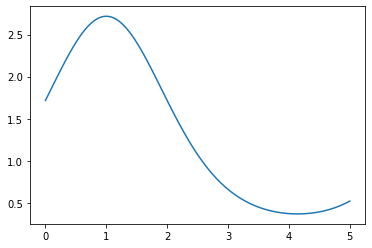

In [24]:
plt.figure()
x = np.linspace(0,5,100)
plt.plot(x,bump(1,1,1,x))

In [25]:
[x.shape for x in pvals[0] if not x is None]

[(1615,), (890,), (1765,), (1314,), (1379,), (1500,), (1664,), (1518,)]

In [26]:
displacements[0][-1].shape

(2, 1518)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

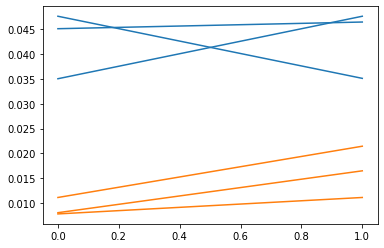

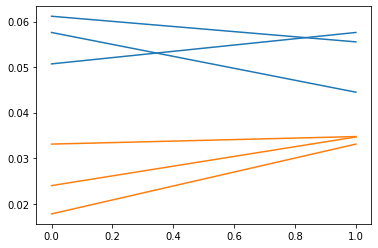

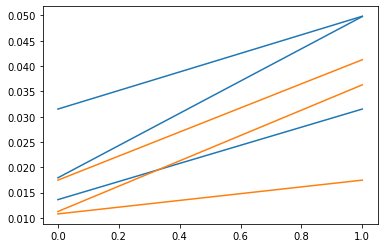

<Figure size 432x288 with 0 Axes>

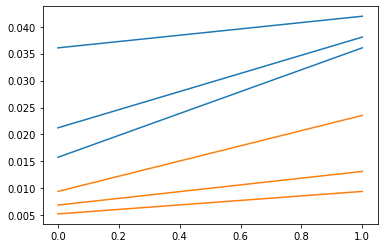

<Figure size 432x288 with 0 Axes>

In [101]:
itype = 1
for iexpt in range(len(tunings_nr[0])):
    plt.figure()
    data = tunings[itype][iexpt]
    if not data is None:
        for pair in ([0,2],[1,3],[2,4]):
            plt.plot(np.nanmean(np.nanmean(data[:,pair,-1,:,8:-8],-1),-1).mean(0),c='C0')
            plt.plot(np.nanmean(np.nanmean(data[:,pair,2,:,8:-8],-1),-1).mean(0),c='C1')

<Figure size 432x288 with 0 Axes>

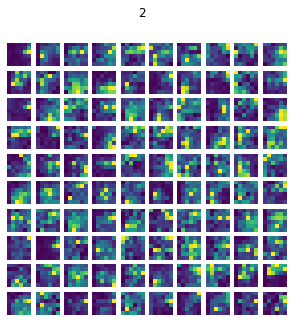

<Figure size 432x288 with 0 Axes>

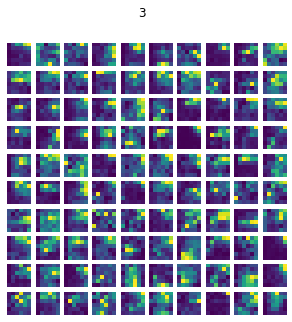

<Figure size 432x288 with 0 Axes>

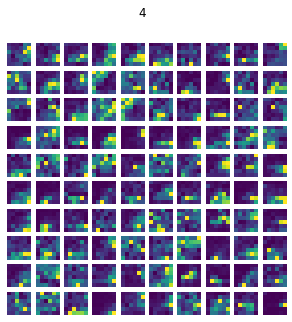

<Figure size 432x288 with 0 Axes>

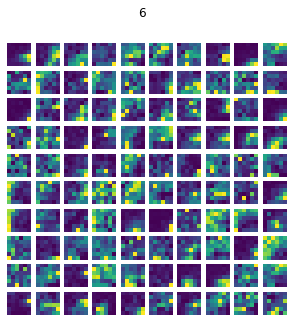

In [104]:
itype = 0
for iexpt in range(len(tunings_nr[0])):
    data = tunings[itype][iexpt]
    if not data is None:
        subset = np.random.choice(data.shape[0],100)
        plt.figure()
        ut.imshow_in_rows(np.nanmean(np.nanmean(data[subset,:,:,:,8:-8],-1),-1))
        plt.suptitle(str(iexpt))

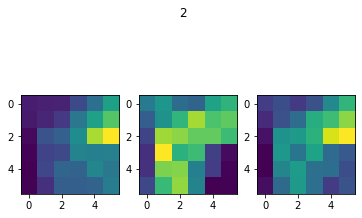

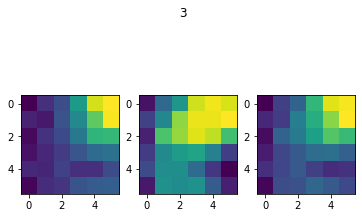

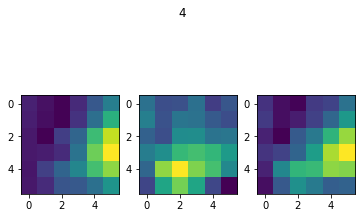

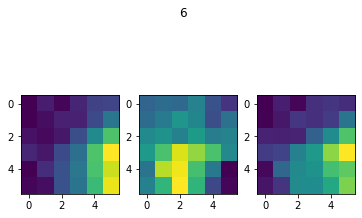

In [118]:
itype = 0
for iexpt in range(len(tunings_nr[itype])):
    data = tunings[itype][iexpt]
    if not data is None:
        crf = np.nanmean(np.nanmean(np.nanmean(data[:,:,:,:,8:-8],-1),-1),1)
        subset = np.argmax(crf,axis=1)>=4
        plt.figure()
        plt.subplot(1,3,1)
        plt.imshow(np.nanmean(np.nanmean(np.nanmean(data[subset],-1),-1),0))
        plt.subplot(1,3,2)
        plt.imshow(np.nanmean(np.nanmean(np.nanmean(data[~subset],-1),-1),0))
        plt.subplot(1,3,3)
        plt.imshow(np.nanmean(np.nanmean(np.nanmean(data,-1),-1),0))
        plt.suptitle(str(iexpt))

<Figure size 432x288 with 0 Axes>

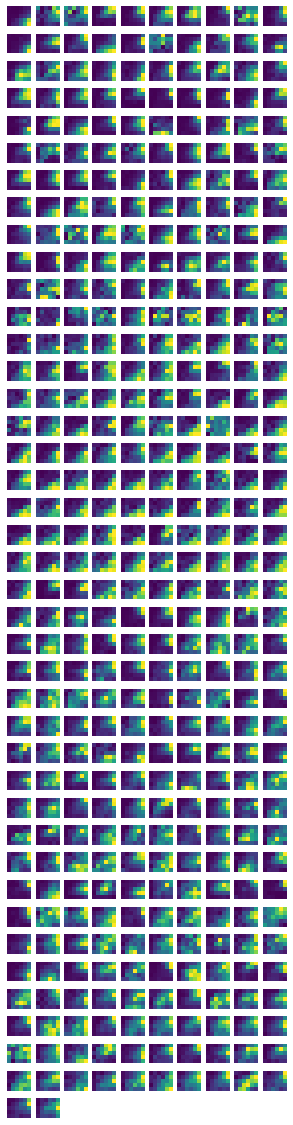

In [139]:
itype = 1
ialign = 0
plt.figure()
crf = np.nanmean(rs[itype][ialign],1)
subset = np.argmax(crf,axis=1)>=3
ut.imshow_in_rows(rs[itype][ialign][subset])

In [140]:
plt.close('all')

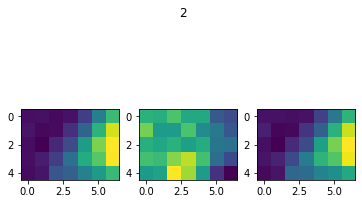

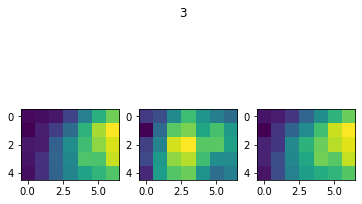

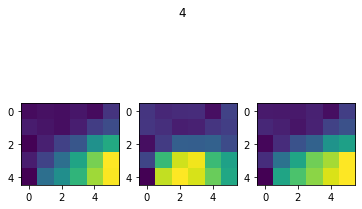

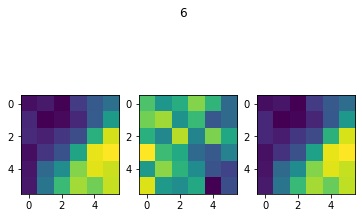

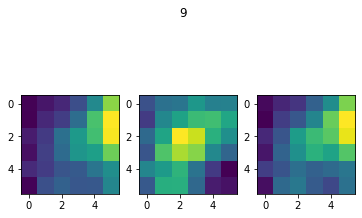

In [116]:
itype = 1
for iexpt in range(len(tunings_nr[itype])):
    data = tunings[itype][iexpt]
    if not data is None:
        crf = np.nanmean(np.nanmean(np.nanmean(data[:,:,:,:,8:-8],-1),-1),1)
        subset = np.argmax(crf,axis=1)>=4
        plt.figure()
        plt.subplot(1,3,1)
        plt.imshow(np.nanmean(np.nanmean(np.nanmean(data[subset],-1),-1),0))
        plt.subplot(1,3,2)
        plt.imshow(np.nanmean(np.nanmean(np.nanmean(data[~subset],-1),-1),0))
        plt.subplot(1,3,3)
        plt.imshow(np.nanmean(np.nanmean(np.nanmean(data,-1),-1),0))
        plt.suptitle(str(iexpt))

<Figure size 432x288 with 0 Axes>

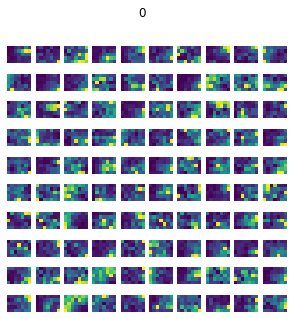

<Figure size 432x288 with 0 Axes>

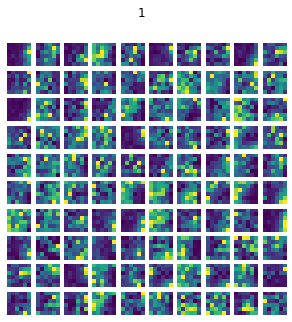

<Figure size 432x288 with 0 Axes>

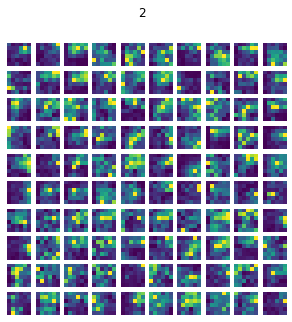

<Figure size 432x288 with 0 Axes>

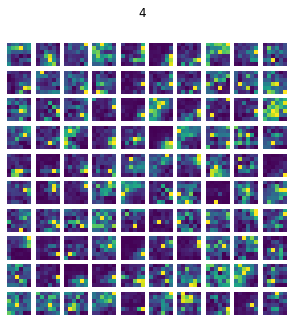

<Figure size 432x288 with 0 Axes>

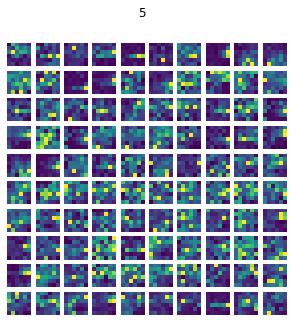

<Figure size 432x288 with 0 Axes>

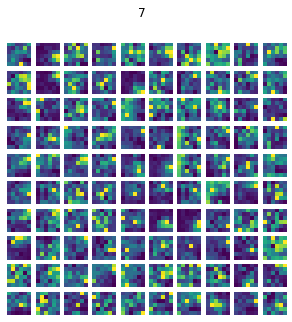

In [106]:
itype = 0
for iexpt in range(len(tunings_nr[itype])):
    data = tunings_nr[itype][iexpt]
    if not data is None:
        subset = np.random.choice(data.shape[0],100)
        plt.figure()
        ut.imshow_in_rows(np.nanmean(np.nanmean(data[subset,:,:,:,8:-8],-1),-1))
        plt.suptitle(str(iexpt))

<Figure size 432x288 with 0 Axes>

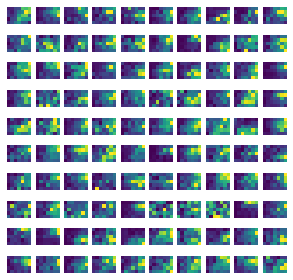

<Figure size 432x288 with 0 Axes>

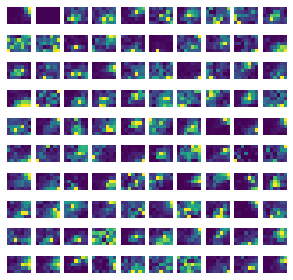

<Figure size 432x288 with 0 Axes>

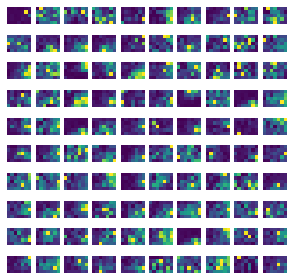

<Figure size 432x288 with 0 Axes>

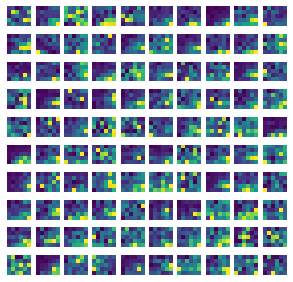

<Figure size 432x288 with 0 Axes>

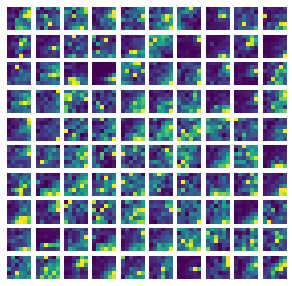

<Figure size 432x288 with 0 Axes>

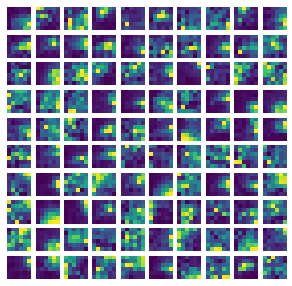

<Figure size 432x288 with 0 Axes>

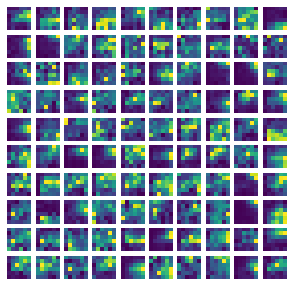

In [88]:
itype = 1
for iexpt in range(len(tunings_nr[itype])):
    data = tunings_nr[itype][iexpt]
    if not data is None:
        subset = np.random.choice(data.shape[0],100)
        plt.figure()
        ut.imshow_in_rows(np.nanmean(np.nanmean(data[subset,:,:,:,8:-8],-1),-1))

<Figure size 432x288 with 0 Axes>

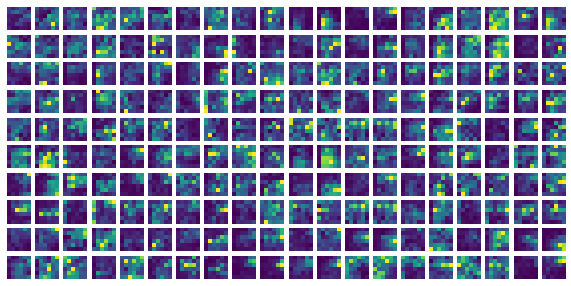

<Figure size 432x288 with 0 Axes>

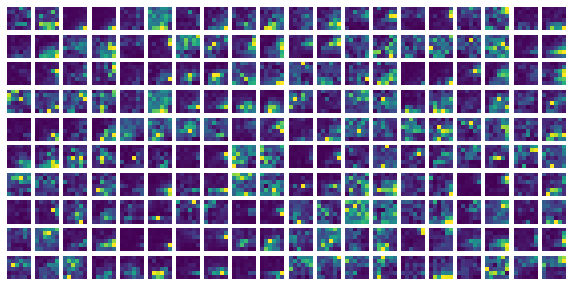

In [85]:
for iexpt in range(len(tunings_nr[0])):
    data1 = tunings_nr[0][iexpt]
    data2 = tunings[0][iexpt]
    if not data1 is None and not data2 is None:
        subset = np.random.choice(data1.shape[0],100)
        plt.figure()
        ut.imshow_in_pairs(np.nanmean(np.nanmean(data1[subset,:,:,:,8:-8],-1),-1),np.nanmean(np.nanmean(data2[subset,:,:,:,8:-8],-1),-1))

<Figure size 432x288 with 0 Axes>

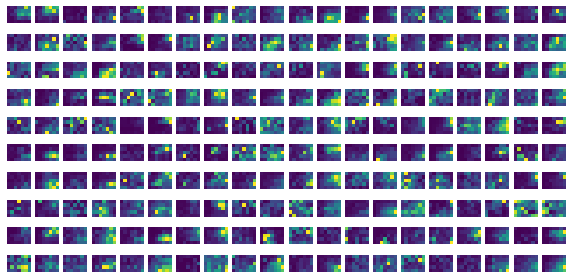

<Figure size 432x288 with 0 Axes>

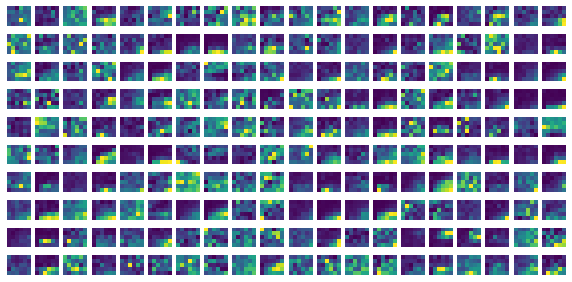

In [86]:
itype = 1
for iexpt in range(len(tunings_nr[itype])):
    data1 = tunings_nr[itype][iexpt]
    data2 = tunings[itype][iexpt]
    if not data1 is None and not data2 is None:
        subset = np.random.choice(data1.shape[0],100)
        plt.figure()
        ut.imshow_in_pairs(np.nanmean(np.nanmean(data1[subset,:,:,:,8:-8],-1),-1),np.nanmean(np.nanmean(data2[subset,:,:,:,8:-8],-1),-1))

In [55]:
dcutoff = 5
selection = [[0,2,3,4,6], None, None, [1,2,3,4,5,9]] # selected on the basis of reasonable-ish-looking retinotopy
rs = []
for icelltype in range(len(tunings)):
    these_tunings = tunings[icelltype]
    these_displacements = displacements[icelltype]
    these_pvals = pvals[icelltype]
    if not selection[icelltype] is None:
        sel = selection[icelltype]
    else:
        sel = np.arange(len(these_tunings))
    these_displacements = [these_displacements[i] for i in sel if not these_tunings[i] is None]
    these_pvals = [these_pvals[i] for i in sel if not these_tunings[i] is None]
    these_tunings = [these_tunings[i] for i in sel if not these_tunings[i] is None]
    aligned = [include_aligned(d,dcutoff,p,0.05,less=True) for d,p in zip(these_displacements,these_pvals)]
    misaligned = [include_aligned(d,dcutoff,p,0.05,less=False) for d,p in zip(these_displacements,these_pvals)]
    raligned = average_up(np.concatenate([x[aligned[i]][:,:5,[0,-5,-4,-3,-2,-1],:,8:-8].mean(-1) for i,x in enumerate(these_tunings)],axis=0))
    rmisaligned = average_up(np.concatenate([x[aligned[i]][:,:5,[0,-5,-4,-3,-2,-1],:,8:-8].mean(-1) for i,x in enumerate(these_tunings)],axis=0))
    rs.append([raligned,rmisaligned])

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  


In [56]:
len(tunings)

2

In [57]:
s = np.arange(5)
c = np.arange(6)

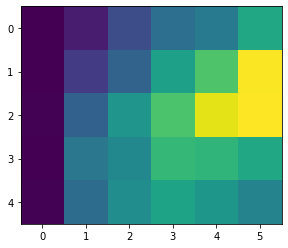

In [63]:
plt.figure()
plt.imshow(np.nanmean(rs[0][1],0))

In [32]:
def f(theta):
    bumpS = theta[:3]
    bumpC = theta[3:]
    return bump(*bumpS,s[:,np.newaxis])*bump(*bumpC,c[np.newaxis,:])

def fsc(theta):
    bumpS = theta[:5]
    bumpC = theta[5:11]
    return bumpS[:,np.newaxis]*bumpC[np.newaxis,:]

def fscs1(theta):
    bumpS1 = theta[11:16]
    c = np.arange(6)
    return fsc(theta) + bumpS1[:,np.newaxis]*c[np.newaxis,:]

def minusLy(y,theta):
    return (0.5*(y-fsc(theta))**2).sum()

def minusLy_extra(y,theta):
    return (0.5*(y-fscs1(theta))**2).sum()

# thetastar = [None for icelltype in range(2)]
# for icelltype in range(2):
#     thetastar[icelltype] = [None for ind in range(rs[icelltype][0].shape[0])]
#     for ind in range(rs[icelltype][0].shape[0]):
#         y = rs[icelltype][0][ind]
#         minusL = lambda theta: minusLy(y,theta)
#         minusdLdtheta = egrad(minusL)
#         thetastar[icelltype][ind] = sop.fmin_l_bfgs_b(minusL,fprime=minusdLdtheta,x0=np.ones((11,)))

In [33]:
ls = [None for icelltype in range(2)]
thetastar = [None for icelltype in range(2)]
for icelltype in range(2):
    ls[icelltype] = np.zeros((rs[icelltype][0].shape[0],))
    thetastar[icelltype] = [None for ind in range(rs[icelltype][0].shape[0])]
    for ind in range(rs[icelltype][0].shape[0]):
        y = rs[icelltype][0][ind]
        minusL = lambda theta: minusLy(y,theta)
        minusdLdtheta = egrad(minusL)
        thetastar[icelltype][ind] = sop.fmin_l_bfgs_b(minusL,fprime=minusdLdtheta,x0=np.ones((11,)))
        ls[icelltype][ind] = thetastar[icelltype][ind][1]

In [34]:
ls_extra = [None for icelltype in range(2)]
thetastar_extra = [None for icelltype in range(2)]
for icelltype in range(2):
    ls_extra[icelltype] = np.zeros((rs[icelltype][0].shape[0],))
    thetastar_extra[icelltype] = [None for ind in range(rs[icelltype][0].shape[0])]
    for ind in range(rs[icelltype][0].shape[0]):
        y = rs[icelltype][0][ind]
        minusL = lambda theta: minusLy_extra(y,theta)
        minusdLdtheta = egrad(minusL)
        x0 = np.concatenate((thetastar[icelltype][ind][0],np.zeros((5,))))
        thetastar_extra[icelltype][ind] = sop.fmin_l_bfgs_b(minusL,fprime=minusdLdtheta,x0=x0)
        ls_extra[icelltype][ind] = thetastar_extra[icelltype][ind][1]

Text(0, 0.5, 'proportion of neurons')

<Figure size 432x288 with 0 Axes>

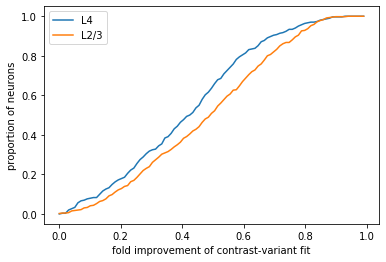

In [35]:
plt.figure()
fudge = 1e-8
h0,x0 = np.histogram((ls[0]-ls_extra[0]+fudge)/(fudge+ls[0]),bins=np.linspace(0,1,100))
h1,x1 = np.histogram((ls[1]-ls_extra[1]+fudge)/(fudge+ls[1]),bins=np.linspace(0,1,100))
#plt.bar(x0[:-1],h0/h0.sum(),alpha=0.5,width=x0[1]-x0[0])
#plt.bar(x1[:-1],h1/h1.sum(),alpha=0.5,width=x0[1]-x0[0])
plt.figure()
plt.plot(x0[:-1],np.cumsum(h0/h0.sum()),label='L4')
plt.plot(x1[:-1],np.cumsum(h1/h1.sum()),label='L2/3')
plt.ylim(-0.05,1.05)
plt.legend()
plt.xlabel('fold improvement of contrast-variant fit')
plt.ylabel('proportion of neurons')
# plt.savefig('figures/parametric_comparison_of_size_contrast_tuning.pdf')

(0, 1)

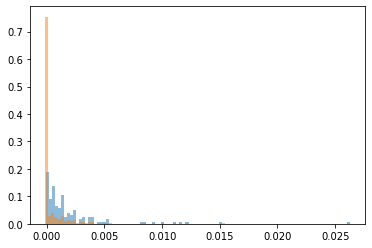

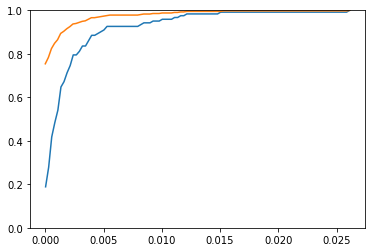

In [52]:
plt.figure()
h0,x0 = np.histogram(ls[0]-0,bins=100)
h1,x1 = np.histogram(ls[1]-0,bins=100)
plt.bar(x0[:-1],h0/h0.sum(),alpha=0.5,width=x0[1]-x0[0])
plt.bar(x1[:-1],h1/h1.sum(),alpha=0.5,width=x0[1]-x0[0])
plt.figure()
plt.plot(x0[:-1],np.cumsum(h0/h0.sum()))
plt.plot(x1[:-1],np.cumsum(h1/h1.sum()))
plt.ylim(0,1)

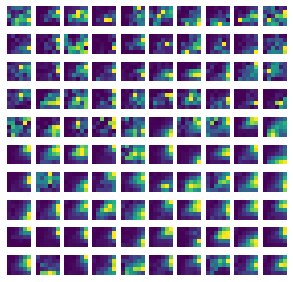

In [40]:
icelltype = 1
ut.imshow_in_rows(rs[icelltype][0][:100])

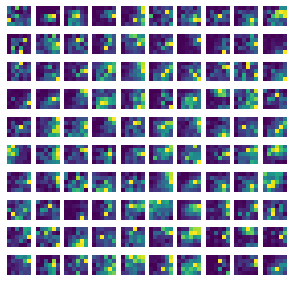

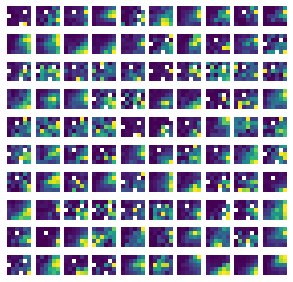

In [51]:
icelltype = 0
ut.imshow_in_rows(rs[icelltype][0][np.random.choice(rs[icelltype][0].shape[0],100)])
icelltype = 1
ut.imshow_in_rows(rs[icelltype][0][np.random.choice(rs[icelltype][0].shape[0],100)])

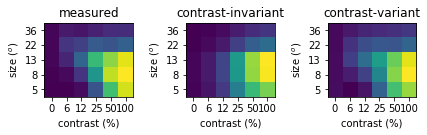

In [42]:
icelltype = 1
for ind in (76,):
    y = rs[icelltype][0][ind]
    plt.figure()
    plt.subplot(1,3,1)
    plt.title('measured')
    sca.show_size_contrast(y,flipud=True)
    plt.subplot(1,3,2)
    plt.title('contrast-invariant')
    sca.show_size_contrast(fsc(thetastar[icelltype][ind][0]),flipud=True)
    plt.subplot(1,3,3)
    plt.title('contrast-variant')
    sca.show_size_contrast(fscs1(thetastar_extra[icelltype][ind][0]),flipud=True)
    plt.tight_layout()
plt.savefig('figures/l23_size_contrast_separable.pdf')

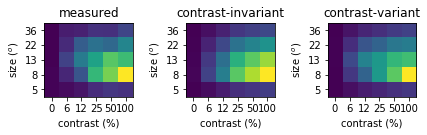

In [46]:
icelltype = 0
for ind in (257,):
    y = rs[icelltype][0][ind]
    plt.figure()
    plt.subplot(1,3,1)
    plt.title('measured')
    sca.show_size_contrast(y,flipud=True)
    plt.subplot(1,3,2)
    plt.title('contrast-invariant')
    sca.show_size_contrast(fsc(thetastar[icelltype][ind][0]),flipud=True)
    plt.subplot(1,3,3)
    plt.title('contrast-variant')
    sca.show_size_contrast(fscs1(thetastar_extra[icelltype][ind][0]),flipud=True)
    plt.tight_layout()
plt.savefig('figures/l4_size_contrast_separable.pdf')

In [89]:
for ind in (3,):
    y = rs[icelltype][0][ind]
    plt.figure()
    plt.subplot(1,3,1)
    sca.show_size_contrast(y)
    plt.subplot(1,3,2)
    sca.show_size_contrast(fsc(thetastar[icelltype][ind][0]))
    plt.subplot(1,3,3)
    sca.show_size_contrast(fscs1(thetastar_extra[icelltype][ind][0]))
    plt.tight_layout()

4

In [37]:
ucontrast = np.array((0,6,12,25,50,100))
usize = np.array((5,8,13,22,35))

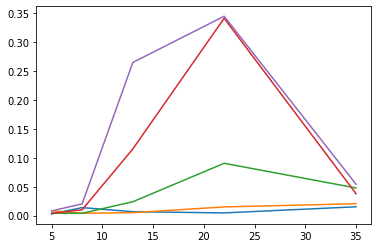

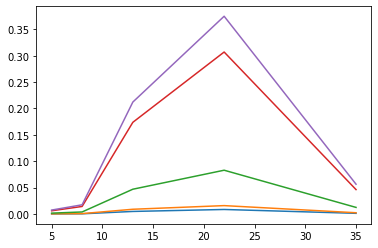

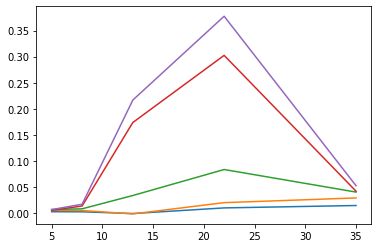

In [55]:
plt.figure()
plt.plot(usize,y[:,1:])
plt.figure()
plt.plot(usize,fsc(thetastar[-1][-1][0])[:,1:])
plt.figure()
plt.plot(usize,fscs1(thetastar_extra[-1][-1][0])[:,1:])